### Load Libraries

In [15]:
import pandas as pd
import numpy as np
import string
import os

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


### Load Data

In [2]:
def make_song_df(path):
    """ Build a data frame from all the text files which consist in path """
    corpus = []
    artists_name = []
    songs_name = []
    folders = [name for name in os.listdir(path) if ( name[0] != '.' )]
    for folder in folders:
        files = os.listdir(f'{path}/{folder}')
        for file in files:
            if file == '.DS_Store':
                continue
            if os.path.isfile(f'{path}/{folder}/{file}'):

                song_name = os.path.splitext(file)[0]
                song_name = song_name.replace('_', ' ')
                songs_name.append(song_name)
    
                artists_name.append(folder.replace('_',' '))
                lyric = open(file=f'{path}/{folder}/{file}',mode='r').read()
                corpus.append(lyric)
            else:
                continue
    dict = {'artist_name': artists_name, 'song_name': songs_name, 'lyric': corpus} 
    df = pd.DataFrame(dict)
    return df

In [3]:
# build a data frame from lyrics files
df = make_song_df(path='../data/')
df

,artist_name,song_name,lyric
0,metallica,free speech for the dumb,"\n\nFree speech, free speech for the dumb\nFre..."
1,metallica,fuel,\n\nGimme fuel\nGimme fire\nGimme that which I...
2,metallica,for whom the bell tolls,\n\nMake his fight on the hill in the early da...
3,metallica,hero of the day,"\n\nMama, they try and break me\n\nThe window ..."
4,metallica,frustration,\n\nFrustration\nIn my lexicon of hate\nI see ...
...,...,...,...
353,billieeilish,idontwannabeyouanymore,\n\nDon't be that way\nFall apart twice a day\...
354,billieeilish,xanny,\n\nWhat is it about them?\nI must be missing ...
355,billieeilish,burn,\n\n[Billie Eilish:]\nLips meet teeth and tong...
356,billieeilish,when the partys over,\n\nDon't you know I'm no good for you?\nI've ...


### Exploratory Data Analysis

### Logistic Regression

In [4]:
# define features and target
X = df['lyric']
y = df['artist_name']

In [5]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((286,), (72,))

#### Define Preprocessing Pipeline

In [6]:
# define tekonizer function
def my_tokenizer(text):
    table = str.maketrans('','',string.punctuation)
    # split the text into separate words
    text = text.split()
    #remove punctuations
    text = [word.translate(table) for word in text]
    #remove words which are less than two character e.g. 's and a
    text = [word for word in text if(len(word)>2)]
    #remove words which include of numbers
    text = [word for word in text if(word.isalpha())]
    return text

In [7]:
# define pipeline for preprocessing (equivalent with using TfidfVectorizer)
preprocessor = Pipeline([
    ('cv', CountVectorizer(lowercase=True,max_df=0.50,tokenizer=my_tokenizer)),
    #('tf', TfidfTransformer())   
])

In [8]:
# take a look at X after preprocessing
matrix = preprocessor.fit_transform(X_train)
tfdf = pd.DataFrame(matrix.todense(), columns=preprocessor['cv'].get_feature_names())
tfdf.describe()

/Users/milad/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aah,aaha,abducts,able,abnormal,about,above,absolute,absolution,absurd,...,youll,young,youre,yours,yourself,youself,youth,youve,zero,zeros
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,...,286.000000,286.000000,286.000000,286.000000,286.00000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,0.006993,0.010490,0.003497,0.006993,0.006993,0.118881,0.073427,0.003497,0.003497,0.003497,...,0.230769,0.048951,0.681818,0.027972,0.06993,0.003497,0.006993,0.202797,0.010490,0.003497
std,0.118262,0.177394,0.059131,0.118262,0.118262,0.450956,0.464373,0.059131,0.059131,0.059131,...,1.194680,0.286017,1.630892,0.235277,0.31679,0.059131,0.083477,1.431767,0.177394,0.059131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,3.000000,1.000000,2.000000,2.000000,4.000000,6.000000,1.000000,1.000000,1.000000,...,14.000000,3.000000,10.000000,3.000000,2.00000,1.000000,1.000000,20.000000,3.000000,1.000000


In [9]:
# print out the stop words
preprocessor['cv'].stop_words_

{'all', 'and', 'that', 'the', 'you', 'your'}

#### Create Classifier

In [12]:
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('m_lr', LogisticRegression())    
])

In [13]:
lr.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('cv',
                                  CountVectorizer(max_df=0.5,
                                                  tokenizer=<function my_tokenizer at 0x7fd16988d430>))])),
                ('m_lr', LogisticRegression())])

/Users/milad/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


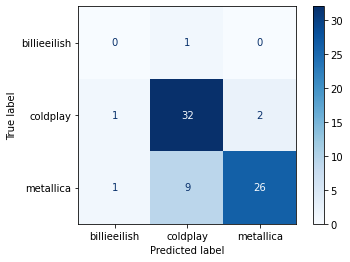

In [16]:
# plot confusion matrix
metrics.plot_confusion_matrix(lr, X_test, y_test,
                              values_format=".4g", 
                              cmap='Blues'
                             );